In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [4]:
dados_enade = pd.read_csv('tabela_final_analise_conceito.csv')

## Distribuição das classes

In [5]:
anos_enade = [2021, 2017, 2014, 2011]
df_2021 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2014 = pd.DataFrame()
df_2011 = pd.DataFrame()

for ano in anos_enade:
    subconjunto_ano = dados_enade.loc[dados_enade['Ano'] == ano]
    subconjunto_ano = subconjunto_ano.reset_index(drop=True)
    if ano == 2021:
        df_2021 = subconjunto_ano
    elif ano == 2017:
        df_2017 = subconjunto_ano
    elif ano == 2014:
        df_2014 = subconjunto_ano
    elif ano == 2011:
        df_2011 = subconjunto_ano

In [6]:
df_2021

,Ano,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui,Não sei responder.4,nulos_Formacao,Muito boa,Boa,Regular,Fraca,Muito fraca,Não sei responder.5,Nota_Conceito_Faixa
0,2021,1,4,36,0,41,0,0,0,0,...,7,2,3,5,12,14,5,1,1,3
1,2021,0,27,85,0,112,0,0,0,0,...,15,3,11,25,28,38,5,2,3,4
2,2021,0,17,82,0,99,0,0,0,0,...,4,0,14,28,36,20,1,0,0,4
3,2021,0,12,45,0,57,0,0,0,0,...,1,2,0,19,21,15,2,0,0,4
4,2021,0,4,43,0,47,0,0,0,0,...,1,0,3,21,17,6,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2021,0,2,8,0,0,0,0,0,10,...,0,0,2,3,2,3,0,0,0,3
1502,2021,0,4,11,15,0,0,0,0,0,...,1,0,3,8,1,3,0,0,0,4
1503,2021,0,0,8,8,0,0,0,0,0,...,0,0,0,3,4,1,0,0,0,3
1504,2021,0,3,22,0,0,0,25,0,0,...,2,0,3,6,9,6,1,0,0,4


In [6]:
df_2017

,Ano,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui,Não sei responder.4,nulos_Formacao,Muito boa,Boa,Regular,Fraca,Muito fraca,Não sei responder.5,Nota_Conceito_Faixa
0,2017,0,1,22,0,23,0,0,0,0,...,2,1,1,7,10,5,0,0,0,3
1,2017,0,21,58,0,79,0,0,0,0,...,12,2,25,10,14,25,3,1,1,4
2,2017,0,8,31,0,39,0,0,0,0,...,1,0,10,10,10,8,0,0,1,4
3,2017,0,12,53,0,65,0,0,0,0,...,8,0,11,17,14,18,2,2,1,3
4,2017,0,0,26,0,26,0,0,0,0,...,4,1,0,6,12,7,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,2017,0,0,18,18,0,0,0,0,0,...,0,0,0,8,5,4,1,0,0,3
1601,2017,0,1,14,15,0,0,0,0,0,...,2,2,0,5,2,7,0,1,0,4
1602,2017,0,0,3,0,0,0,0,0,3,...,0,0,0,0,1,1,0,0,1,2
1603,2017,0,0,12,12,0,0,0,0,0,...,1,0,0,4,2,6,0,0,0,3


In [7]:
df_2014

,Ano,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui,Não sei responder.4,nulos_Formacao,Muito boa,Boa,Regular,Fraca,Muito fraca,Não sei responder.5,Nota_Conceito_Faixa
0,2014,0,4,12,0,16,0,0,0,0,...,1,0,2,2,6,6,0,0,0,4
1,2014,0,4,24,0,28,0,0,0,0,...,6,0,2,6,6,10,2,2,0,4
2,2014,0,13,43,0,56,0,0,0,0,...,9,0,11,11,13,14,5,2,0,4
3,2014,0,8,29,0,37,0,0,0,0,...,2,0,6,10,9,11,0,1,0,4
4,2014,0,3,37,0,40,0,0,0,0,...,0,0,2,15,11,12,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,2014,0,1,28,0,0,0,0,29,0,...,0,0,0,13,10,5,0,1,0,3
1501,2014,0,3,20,0,0,0,0,23,0,...,2,0,3,4,3,10,1,0,2,3
1502,2014,0,4,58,0,0,0,0,62,0,...,2,1,0,40,9,10,1,0,2,2
1503,2014,0,1,22,0,0,0,0,23,0,...,0,1,0,21,1,1,0,0,0,2


In [8]:
df_2011

,Ano,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui,Não sei responder.4,nulos_Formacao,Muito boa,Boa,Regular,Fraca,Muito fraca,Não sei responder.5,Nota_Conceito_Faixa
0,2011,0,12,28,0,40,0,0,0,0,...,0,13,0,6,13,5,2,1,13,3
1,2011,0,3,38,0,41,0,0,0,0,...,0,2,0,21,17,1,0,0,2,4
2,2011,0,3,39,0,42,0,0,0,0,...,0,1,0,12,17,9,3,0,1,3
3,2011,0,4,24,0,28,0,0,0,0,...,0,4,0,8,11,4,1,0,4,3
4,2011,0,1,12,0,13,0,0,0,0,...,0,1,0,9,2,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,2011,1,2,58,0,61,0,0,0,0,...,0,4,0,14,26,15,2,1,3,3
1218,2011,0,1,5,6,0,0,0,0,0,...,0,1,0,1,3,1,0,0,1,2
1219,2011,0,1,8,9,0,0,0,0,0,...,0,1,0,3,4,0,0,1,1,4
1220,2011,0,0,3,3,0,0,0,0,0,...,0,0,0,0,1,2,0,0,0,5


In [18]:
def contar_classes(dataset, classes):
    dict_ocorrencias = {}
    for classe in classes:
        numero_de_ocorrencias = dataset["Nota_Conceito_Faixa"].value_counts()[classe]
        dict_ocorrencias[f"{classe}"] = numero_de_ocorrencias
    return dict_ocorrencias

def mostrar_distribuicao(dataset, classes):
    dict_ocorrencias = contar_classes(dataset, classes)
    
    plt.style.use('_mpl-gallery')
    
    x = dict_ocorrencias.keys()
   
    y = dict_ocorrencias.values()
    
    fig, ax = plt.subplots(figsize=(5,3))
    
    bars = ax.bar(x, y, width=1, edgecolor="white")

    ax.bar_label(bars)

    ax.set(xlim=(-1, 5), xticks=np.arange(0, 5, 1),
           ylim=(0, 3500), yticks=np.arange(0, 3500, 500))
    
    plt.show()

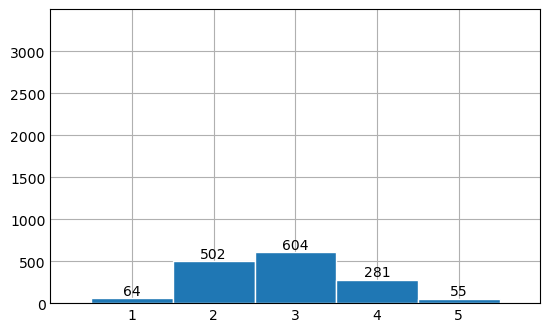

In [19]:
mostrar_distribuicao(df_2021, [1,2,3,4,5])

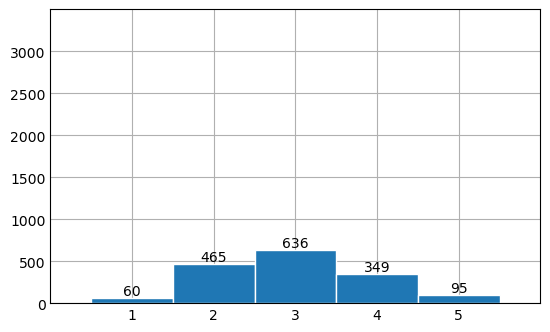

In [20]:
mostrar_distribuicao(df_2017, [1,2,3,4,5])

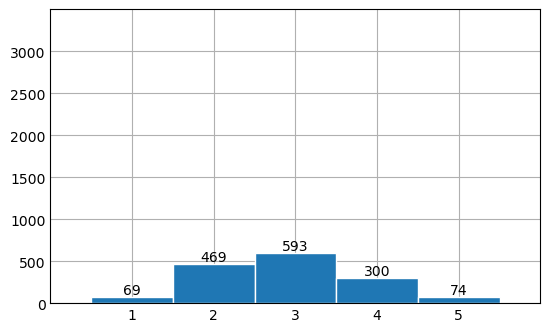

In [21]:
mostrar_distribuicao(df_2014, [1,2,3,4,5])

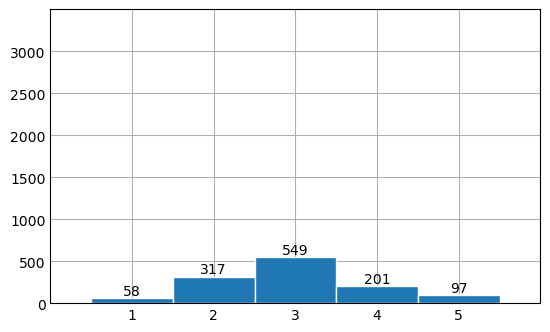

In [22]:
mostrar_distribuicao(df_2011, [1,2,3,4,5])

## Estudo do Z-Score

In [7]:
df_2021_analise = pd.DataFrame()
df_2021_analise = pd.concat([df_2021["Numero_Faltantes"], df_2021["Nota_Conceito_Faixa"]], axis=1)
df_2021_analise

,Numero_Faltantes,Nota_Conceito_Faixa
0,4,3
1,27,4
2,17,4
3,12,4
4,4,4
...,...,...
1501,2,3
1502,4,4
1503,0,3
1504,3,4


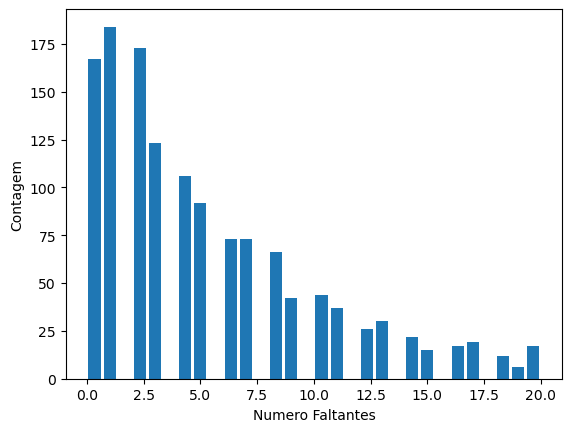

In [14]:
plt.hist(df_2021_analise["Numero_Faltantes"], bins=30, range=(0, 20), rwidth=0.8)
plt.xlabel('Numero Faltantes')
plt.ylabel('Contagem')
plt.show()

In [15]:
df_2021_analise["Numero_Faltantes"].mean()

12.383134130146082

In [16]:
df_2021_analise["Numero_Faltantes"].std()

45.10700405725479

In [18]:
limite_superior = df_2021_analise["Numero_Faltantes"].mean() + (3 * df_2021_analise["Numero_Faltantes"].std())
limite_superior

147.70414630191047

In [19]:
limite_inferior = df_2021_analise["Numero_Faltantes"].mean() - (3 * df_2021_analise["Numero_Faltantes"].std())
limite_inferior

-122.93787804161829

In [20]:
df_2021_analise[(df_2021_analise["Numero_Faltantes"]>limite_superior) | (df_2021_analise["Numero_Faltantes"]<limite_inferior)]

,Numero_Faltantes,Nota_Conceito_Faixa
648,201,2
695,184,2
840,735,3
841,1066,2
842,428,2
866,253,2
968,219,3
969,272,2
1089,193,2
1172,518,2


In [31]:
df_2021_analise["Z-Score"] = (df_2021_analise["Numero_Faltantes"] - df_2021_analise["Numero_Faltantes"].mean()) / df_2021_analise["Numero_Faltantes"].std()

In [32]:
df_2021_analise

,Numero_Faltantes,Nota_Conceito_Faixa,Z-Score
0,4,3,-0.185850
1,27,4,0.324049
2,17,4,0.102354
3,12,4,-0.008494
4,4,4,-0.185850
...,...,...,...
1501,2,3,-0.230189
1502,4,4,-0.185850
1503,0,3,-0.274528
1504,3,4,-0.208019


In [33]:
df_2021_analise[df_2021_analise["Z-Score"]>3]

,Numero_Faltantes,Nota_Conceito_Faixa,Z-Score
648,201,2,4.181543
695,184,2,3.804661
840,735,3,16.020059
841,1066,2,23.358165
842,428,2,9.214021
866,253,2,5.334357
968,219,3,4.580594
969,272,2,5.755578
1089,193,2,4.004187
1172,518,2,11.209276


In [37]:
df_2021_analise[df_2021_analise["Z-Score"]<-1]

,Numero_Faltantes,Nota_Conceito_Faixa,Z-Score


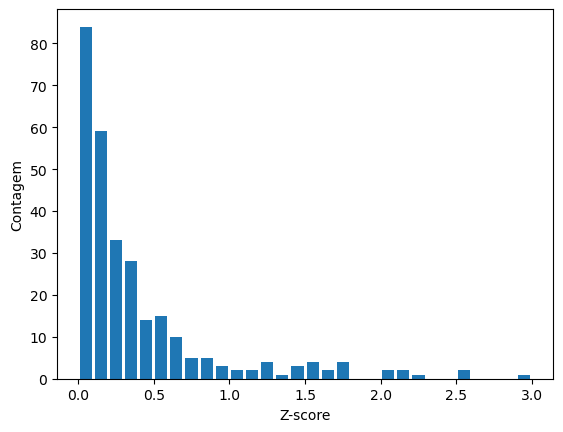

In [40]:
plt.hist(df_2021_analise["Z-Score"], bins=30, range=(0, 3), rwidth=0.8)
plt.xlabel('Z-score')
plt.ylabel('Contagem')
plt.show()

In [27]:
scaler_train = StandardScaler()

In [ ]:
scaler_train.fit(df_faltantes)
normalized_train = scaler_train.transform(df_faltantes)
normalized_train

### Aplicação do Z-Score no dataset

In [12]:
pre_analise_zscore = []

for i in range(3):
    medida = []
    
    for coluna in dados_enade:
        
        if i == 0:
            medida.append(dados_enade[coluna].min())
        elif i == 1:
            medida.append(dados_enade[coluna].max())
        elif i == 2:
            medida.append(dados_enade[coluna].mean())
            
    pre_analise_zscore.append(medida)

pre_analise_zscore_df = pd.DataFrame(pre_analise_zscore)

pre_analise_zscore_df.columns = dados_enade.columns

In [13]:
pre_analise_zscore_df

,Ano,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui,Não sei responder.4,nulos_Formacao,Muito boa,Boa,Regular,Fraca,Muito fraca,Não sei responder.5,Nota_Conceito_Faixa
0,2011.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,2021.000000,49.00000,1066.000000,1184.000000,1721.000000,261.000000,153.000000,681.000000,223.000000,516.000000,...,173.000000,1017.000000,866.000000,491.000000,441.000000,415.000000,40.000000,30.000000,1015.000000,5.000000
2,2016.002569,0.05841,8.183282,26.674203,10.703666,7.589928,1.207605,1.926173,1.082049,2.790853,...,1.603631,1.724392,4.386948,12.139774,8.990408,6.454779,0.747859,0.378554,1.817575,2.917437


In [14]:
pre_analise_zscore_df.to_csv('./{}.csv'.format('analise_zscore'),index=False)

Análise de valores de atributos

In [43]:
def contar_classes(dataset, atributo, valores):
    dict_ocorrencias = {}
    for valor in valores:
        numero_de_ocorrencias = dataset[atributo].value_counts()[valor]
        dict_ocorrencias[f"{valor}"] = numero_de_ocorrencias
    return dict_ocorrencias

def mostrar_distribuicao_continuo():
    plt.figure(figsize=(10,5))
    plt.title('Availability & Price')
    plt.xlabel('Availability')
    plt.ylabel('Price')
    sns.scatterplot(data['availability_365'],data['price'])
    plt.show()

def mostrar_distribuicao(dataset, atributo, valores):
    dict_ocorrencias = contar_classes(dataset, atributo, valores)
    
    plt.style.use('_mpl-gallery')
    
    x = dict_ocorrencias.keys()
   
    y = dict_ocorrencias.values()
    
    fig, ax = plt.subplots(figsize=(5,3))
    
    bars = ax.bar(x, y, width=1, edgecolor="white")

    ax.bar_label(bars)

    ax.set(xlim=(-1, 7), xticks=np.arange(0, 7, 1),
           ylim=(0, 80000), yticks=np.arange(0, 80000, 10000))
    
    plt.show()

In [27]:
enade_2021 = pd.read_csv("./pre-process_2021.csv")

In [38]:
enade_2017 = pd.read_csv("./pre-process_2017.csv")

In [32]:
enade_2014 = pd.read_csv("./pre-process_2014.csv")

In [29]:
enade_2011 = pd.read_csv("./pre-process_2011.csv")

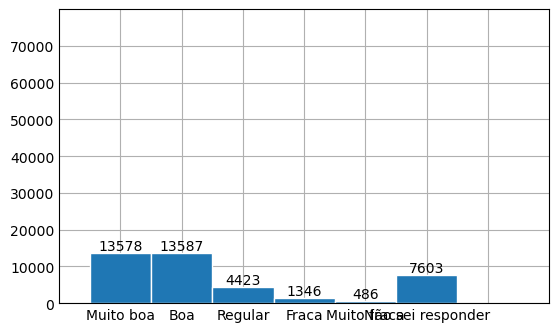

In [60]:
mostrar_distribuicao(enade_2011, "Formacao", ['Muito boa', 'Boa', 'Regular', 'Fraca', 'Muito fraca', 'Não sei responder'])

In [31]:
enade_sem_porc = pd.read_csv("./tabela_final_analise_conceito.csv")

In [23]:
enade_todos_anos = pd.read_csv("./teste_OHE_curso_treinamento.csv")

In [4]:
enade_2021 = pd.read_csv("./concept_drift/tabela_final_2021_treinamento.csv")

<Axes: xlabel='Nota_Conceito_Faixa', ylabel='Anos_Graduacao'>

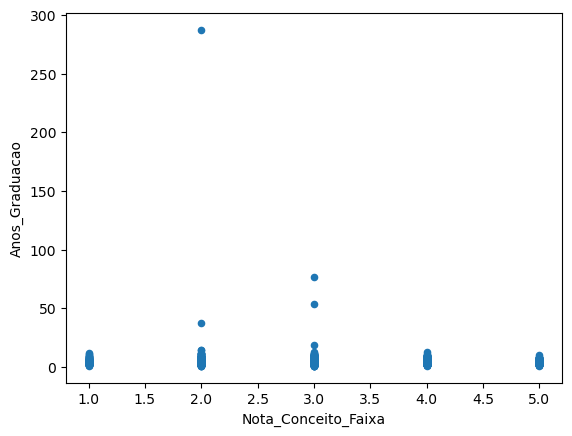

In [26]:
enade_todos_anos.plot(x='Nota_Conceito_Faixa', y='8-12', kind="scatter")

<Axes: xlabel='Nota_Conceito_Faixa', ylabel='Não se aplica.1'>

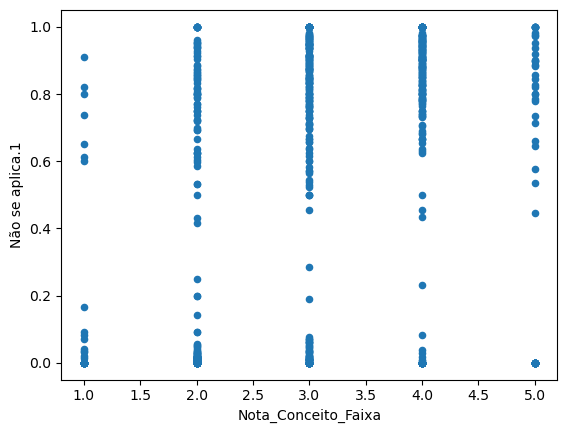

In [5]:
enade_2021.plot(x='Nota_Conceito_Faixa', y='Não se aplica.1', kind="scatter")

<Axes: xlabel='Nota_Conceito_Faixa', ylabel='Pública'>

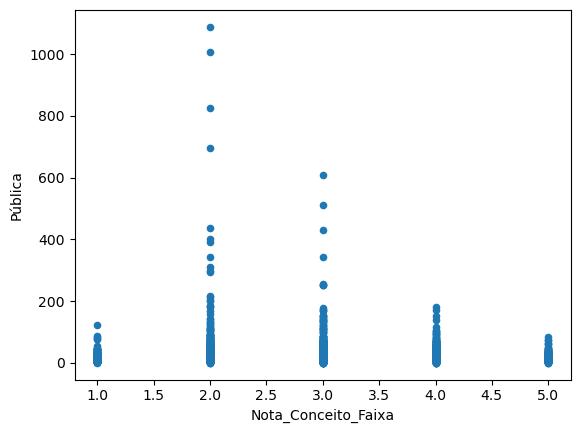

In [32]:
enade_sem_porc.plot(x="Nota_Conceito_Faixa", y="Pública", kind="scatter")